In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [24]:
data_tissue = pd.read_csv('./db/dataset_tissue.txt', sep=',')
data_no_id = data_tissue.drop(columns=["Unnamed: 0"])

In [25]:
scaler = StandardScaler()

data_standardized = scaler.fit_transform(data_no_id)

In [38]:
# print(data_standardized.shape)
print(data_standardized)

[[ 1.52201531  1.68103608  1.60234851 ...  1.39914366  1.4229061
   1.59260724]
 [-0.74933779 -0.38578385 -0.6880693  ... -0.38696798 -0.31438262
  -0.20212664]
 [ 0.02055469  0.19922027  0.172952   ... -0.16575658 -0.15214989
   0.00685725]
 ...
 [ 0.98569479  1.08849312  0.44857384 ...  0.72664432  0.4470396
   1.10895153]
 [ 0.50851141  0.4372116   0.59462488 ...  0.50905932  0.66762032
   0.51354545]
 [-0.02300976  0.27640556  0.11869393 ...  0.26426614  0.12907158
   0.36180191]]


In [28]:
pca_original = PCA()
data_pca_original = pca_original.fit_transform(data_standardized)

In [29]:
explained_variance_ratio_cumsum_original = pca_original.explained_variance_ratio_.cumsum()

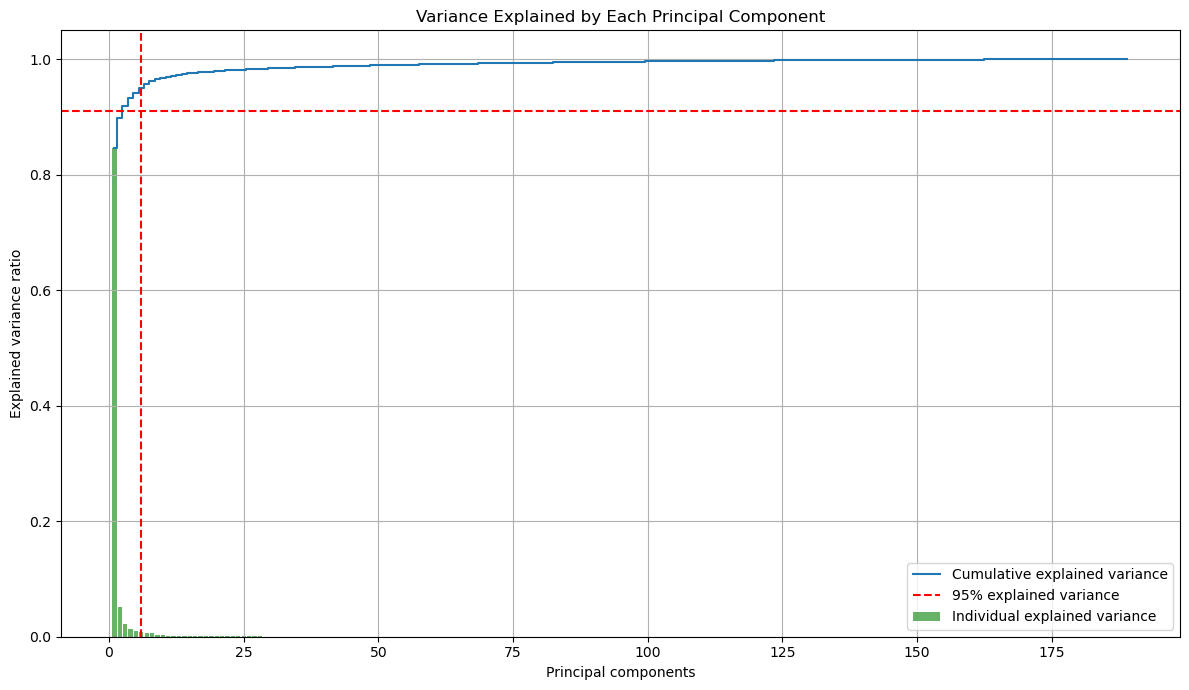

In [30]:
plt.figure(figsize=(12, 7))
plt.bar(range(1, 190), pca_original.explained_variance_ratio_[:189], alpha=0.6, align='center',
        label='Individual explained variance', color='g')
plt.step(range(1, 190), explained_variance_ratio_cumsum_original[:189], where='mid', label='Cumulative explained variance')
plt.axhline(y=0.91, color='r', linestyle='--', label="95% explained variance")
num_components_95 = (explained_variance_ratio_cumsum_original >= 0.95).argmax() + 1
plt.axvline(x=num_components_95, color='r', linestyle='--')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.grid(True)
plt.title("Variance Explained by Each Principal Component")
plt.tight_layout()
plt.show()


In [49]:
# Crear un DataFrame para mostrar la varianza explicada por cada componente
num_components = pca_original.n_components_
explained_variance_df = pd.DataFrame({
    'Principal Component': range(1, num_components + 1),
    'Explained Variance Ratio (%)': (pca_original.explained_variance_ratio_ * 100).round(2) 
})

print(explained_variance_df)


     Principal Component  Explained Variance Ratio (%)
0                      1                         84.69
1                      2                          5.09
2                      3                          2.14
3                      4                          1.33
4                      5                          0.97
..                   ...                           ...
184                  185                          0.00
185                  186                          0.00
186                  187                          0.00
187                  188                          0.00
188                  189                          0.00

[189 rows x 2 columns]


In [36]:
num_components_95 = (explained_variance_ratio_cumsum_original >= 0.89).argmax() + 1
print(f"Número de componentes para lograr una variación del 95%: {num_components_95}")

Número de componentes para lograr una variación del 91%: 2
